# P-Values

**Disclaimer: All code used to generate these visuals are out of scope. You do not need to understand anything about how these plots were made.** 

### Goals:
1. What is a p-value?
2. How do we calculate a p-value?
3. What is the significance of a p-value?

### Definition:
The p-value is the chance that under the null hypothesis, that the test statistic is equal to the value that was observed in the data or even further in the direction of the alternative. 

Intuitive Interpretation: p-value shows how likely it is, if the null model really represents what's going on in the real world, we were able to get the result we observed or something even more extreme.

### Coin Flip Demonstration: 
Let's break down our definition and try to understand each part in the context of the coin flip demonstration from lecture.  

We are given a supposedly fair coin. Upon flipping the coin 10 times, we get a result of 9 heads. Suspicious of these results, we would like to test if this coin were actually fair.

### Let's first define our null and alternative hypotheses. 
**Null Hypothesis:** Our coin is perfectly balanced (as all things should be) and has an equal chance of flipping heads or tails, and that any difference is due to random chance.<br/>
**Alternative Hypothesis:** Our coin is biased. 

**Relevance to p-value:** The p-value is the chance that <span style = "color : red"> under the null hypothesis</span>, that the test statistic is equal to the value that was observed in the data or even further in the direction of the alternative.<br/>
Remember that when we calculate p-value, we are trying to find how likely it is for an event to occur when *the null hypothesis is true*. This means that we use our null hypothesis as the default standard. 

### Next, let's pick a test statistic and calculate the observed value. 
We choose our test statistic to be the absolute difference between the number of heads that appeared and the expected number of heads (5).<br/>
This means that our observed value is abs(9 - 5) = 4 

**Relevance to p-value:** The p-value is the chance that under the null hypothesis, that <span style = "color : red">the test statistic </span>is equal to the value that was observed in the data or even further in the direction of the alternative.<br/>
We need some way to quantify the degree of agreement between the null hypothesis and each sample of data. This is done using the test statistic; in this example, larger values of test statistics correspond with the alternative. We need to calculate the observed test statistic to use as a comparison.   

### Finally, we perform a hypothesis test. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
np.random.seed(2701781)

In [2]:
# Given a sample space for the coin,
# returns absolute difference between number of observed heads and 5 (assumes 10 flips)

def calculateTS(possibleOutcomes): 
    headCount = 0 
    for i in range(10): 
        if (np.random.choice(possibleOutcomes) == "heads"):
            headCount += 1
    return np.abs(headCount - 5)

In [3]:
# Given the possible outcomes for the coin, total number of repetitions, and observed value,
# runs the simulation totalRepetitions number of times, plots out a bar chart of 
# the head rolls (superimposed with observed value), and returns 
# the testStatistics array (each index corresponds with frequency)

def runSimulation(possibleOutcomes, totalRepetitions, observedValue): 
    testStatistics = np.zeros(6)
    observed = list(np.zeros(observedValue))
    
    for i in range(totalRepetitions):
        testStatistics[calculateTS(possibleOutcomes)] += 1

    observed.extend(testStatistics[observedValue:])
    observed = np.array(observed)
    
    plt.bar(np.arange(6), testStatistics / totalRepetitions, align = "center", color = "blue");
    plt.bar(np.arange(6), observed / totalRepetitions, align = "center", color = "gold", alpha = 1.0)
    plt.xticks(np.arange(6), np.arange(6));
    plt.title("Simulating " + str(totalRepetitions) + " Times With " + str(possibleOutcomes) + " Chance of Heads");
    plt.ylabel("Frequency that Test Statistic Appeared"); 
    plt.xlabel("Absolute Difference between 5 and Number of Heads Rolled");
    plt.show()
    return testStatistics

In [4]:
# Given the observed value and an array of frequencies 
# returns the p-value (in percent)

def calculatePVal(observedVal, testStatistic):
    return 100 * sum(tsUnderNull[observedValue:]) / sum(tsUnderNull)

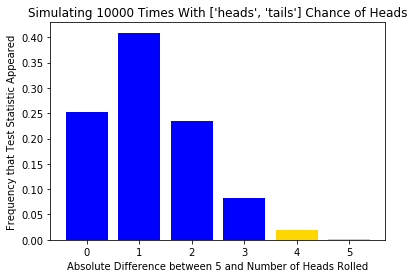

In [5]:
# We repeat the simulation totalRepetitions number of time (default = 10000)
totalRepetitions = 10000       

# sample space we use (default = ["heads", "tails"])
possibleOutcomes = np.array(["heads", "tails"]) 

# testStatistic for our observed value of 9 (calculated with 9 - 5)
observedValue = 4               

tsUnderNull = runSimulation(possibleOutcomes, totalRepetitions, observedValue)

**Relevance to p-value:** The p-value is the chance that under the null hypothesis, that the test statistic <span style = "color : red">is equal to the value that was observed in the data or even further in the direction of the alternative.</span><br/>
We need some way to quantify the degree of agreement between the null hypothesis and each sample of data. This is done using the test statistic; larger values of test statistics correspond with the alternative. We need to calculate the observed test statistic to use as a comparison.   

### Finally, we can calculate the p-value.
The above graph shows the distribution of simulated test statistics under the null hypothesis. To calculate the p-value, we take the values that are equal to or more extreme than our observed value of 4. 

In [6]:
tsUnderNull

array([2524., 4089., 2346.,  834.,  190.,   17.])

In [7]:
print("p-value: " + str(calculatePVal(observedValue, tsUnderNull)) + "%")

p-value: 2.07%


**Interpretation and Significance:** We interpret this p-value to mean that when we flipped a fair coin 10000 times, we found that only 2.07% of the total simulations resulted in us getting 9 or more heads/tails. Lower p-values indicate that an event is less likely to happen under normal conditions (we only had a 2.16% of observing 9 heads). Depending on the p-value cutoff, we can either reject of fail to reject the null hypothesis. The standard p-value cutoff is 5%. 

### Summary 

The p-value represents how likely it is we saw our observed value given the null hypothesis is true. To find the p-value, we perform a hypothesis test and find the proportion of simulations that resulted in a test statistic greater than or equal to our observed test statistic. Smaller p-values correspond with the observed event being less likely to happen while larger p-values correspond with the event being more likely to happen under the null. 

### Conceptual Check

Let's say that instead of flipping 9 heads, we observed 6 heads instead. Would this correlate with a smaller or larger p-value? Why? 

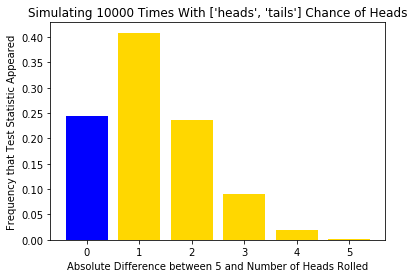

In [8]:
# We repeat the simulation totalRepetitions number of time (default = 10000)
totalRepetitions = 10000       

# sample space we use (default = ["heads", "tails"])
possibleOutcomes = np.array(["heads", "tails"]) 

# testStatistic for our observed value of 6 (calculated with 6 - 5)
observedValue = 1        

tsUnderNull = runSimulation(possibleOutcomes, totalRepetitions, observedValue)

In [9]:
print("p-value: " + str(calculatePVal(observedValue, tsUnderNull)) + "%")

p-value: 75.55%


**Answer:** An observed value of 6 heads out of 10 would correspond with a larger p-value because it's much more likely to roll 6 or more heads/tails compared to rolling 9 or more heads/tails. An interpretation of the p-value would be that of 10000 flips with a fair coin, 75.55% of them had 6 or more heads/tails. 